<a href="https://colab.research.google.com/github/prajaktasonawane98/My-Projects/blob/main/Task3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name : Prajakta Sonawane**

## **Task 3- Perform Exploratory Data Analysis On Sample Supertore Data**

### **Data Science and Business Analytics Intern at The Sparks Foundation**

**Problem Statement** - Find out the weak areas where we work to
make more profit.

### **Importing Liabraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**Loading Dataset**

In [2]:
superstore = pd.read_csv('/content/SampleSuperstore.csv')
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
superstore.shape

(9994, 13)

In [4]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


###**Dataset summury**

In [5]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###**Visualizing Correlation Matrix**

In [6]:
corr_mat = superstore.corr()
corr_mat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [7]:
plt.rcParams['figure.figsize'] = (15,6)

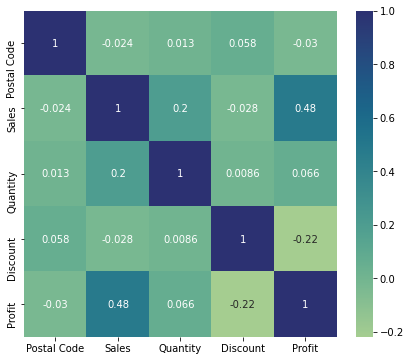

In [8]:
plt.figure(figsize=(7,6))
sns.heatmap(corr_mat, cmap='crest', annot=True)

In [9]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### **Superstore Category visualization**

Text(0.5, 1.0, 'Superstore Categories')

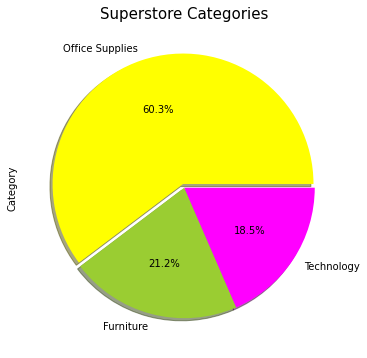

In [10]:
plt.figure(figsize=(15,6))
cat = superstore['Category'].value_counts()

cmap = plt.get_cmap('Spectral')
colors = ["yellow", "yellowgreen", "magenta"]
cat.plot.pie(autopct="%1.1f%%", shadow=True, colors=colors, explode = (0.03, 0, 0))
plt.title("Superstore Categories",fontsize=15)

**Analysis** - This pie chart represents that superstore has Office supplies more than furniture and Technology



###**Visualizing Sub-Category**

In [11]:
superstore['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


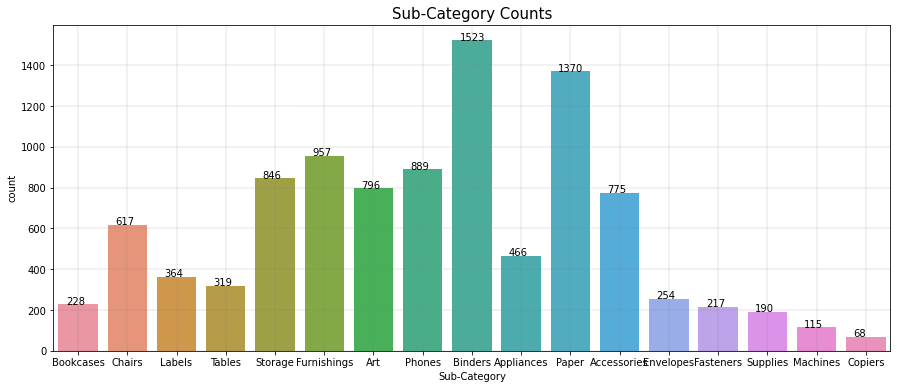

In [12]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(111)
s = sns.countplot('Sub-Category', data = superstore)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Sub-Category Counts", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Superstore sub category products')

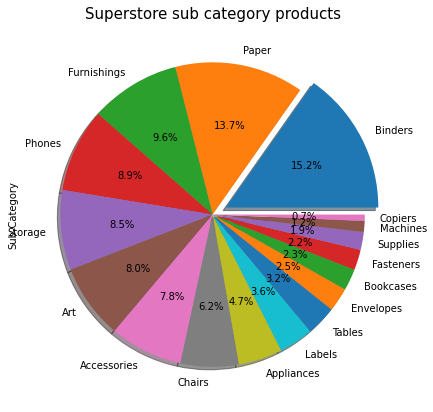

In [13]:
plt.figure(figsize=(15,7))
sub_cat = superstore['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
sub_cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Superstore sub category products', fontsize=15)

**Analysis** - This Graph shows, the store has wide variety of Office Supplies especially in Binders and Paper department.

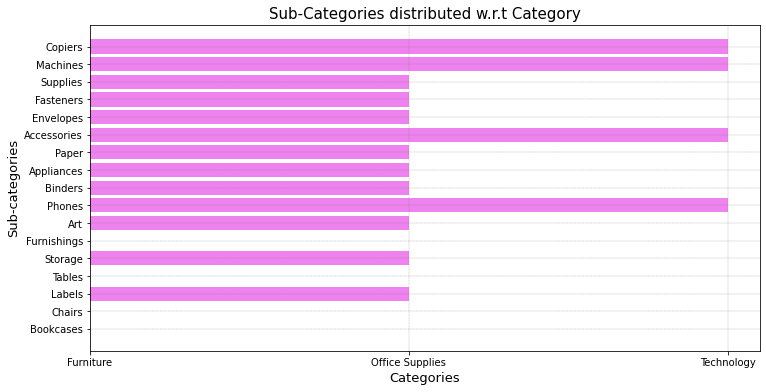

In [14]:
plt.figure(figsize=(12,6))
plt.barh('Sub-Category','Category', data=superstore, color='violet')
plt.xlabel("Categories",fontsize=13)
plt.ylabel("Sub-categories", fontsize=13)
plt.title("Sub-Categories distributed w.r.t Category",fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - From this graph, we can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

### **Visualize the total Sales and Profit by Sub-category**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


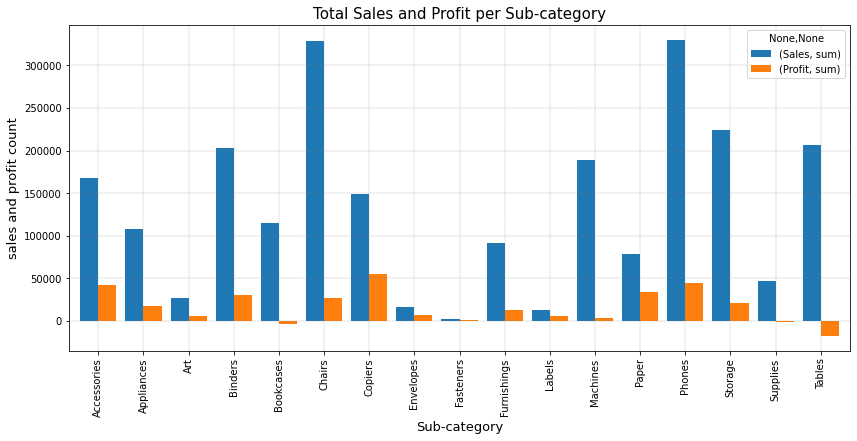

In [15]:
sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another analysis is people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

### **Visualizing the how much prodcuts distributed regionwise**

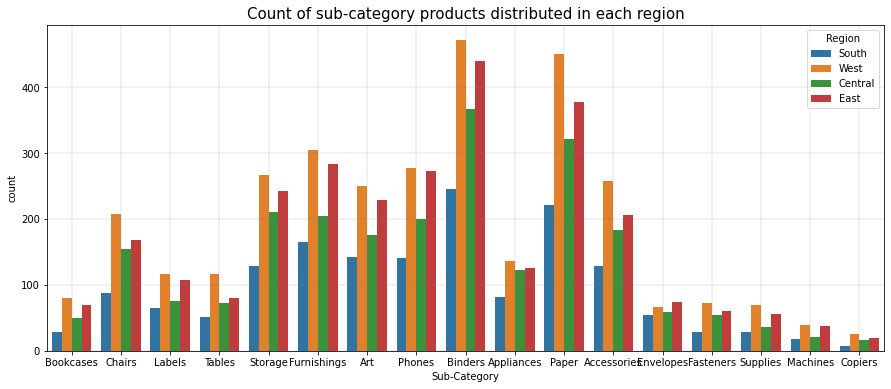

In [16]:
sns.countplot( data=superstore, x='Sub-Category', hue='Region')
plt.title("Count of sub-category products distributed in each region", fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - People residing in Western and eastern part of US tend to order more from superstore.

### **Finding the cost**

In [17]:
# adding new column 'Cost' in the existing dataset
superstore['Cost'] = superstore['Sales'] - superstore['Profit']
print(superstore.head())

        Ship Mode    Segment        Country  ... Discount    Profit       Cost
0    Second Class   Consumer  United States  ...     0.00   41.9136   220.0464
1    Second Class   Consumer  United States  ...     0.00  219.5820   512.3580
2    Second Class  Corporate  United States  ...     0.00    6.8714     7.7486
3  Standard Class   Consumer  United States  ...     0.45 -383.0310  1340.6085
4  Standard Class   Consumer  United States  ...     0.20    2.5164    19.8516

[5 rows x 14 columns]


### **Cost Visualization**

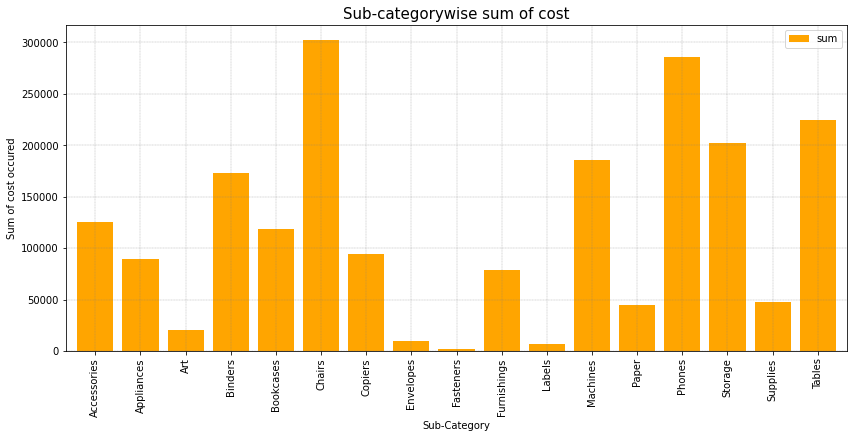

In [18]:
cost_occured = superstore.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8,figsize=(14,6), color='orange')
plt.title('Sub-categorywise sum of cost',fontsize = 15)
plt.ylabel("Sum of cost occured")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

**Analysis** - Retailers spending more cost on Chairs, Phones and Tables

### **Visualization of total sales by sub- category**

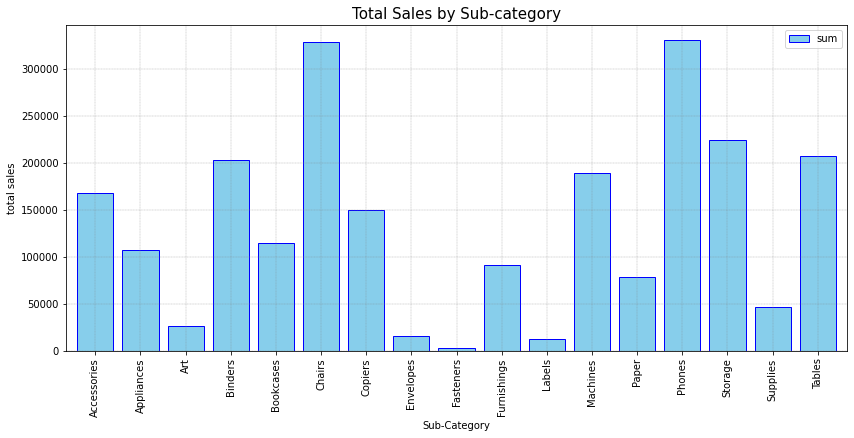

In [19]:
sub_cat_sales = superstore.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8,figsize=(14,6), color='skyblue', edgecolor='blue')
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('total sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

**Analysis** - The graph represents the highest total sale in Phones and chair, means most of the people buy phones and chair from this store

### **Finding Profit %**

In [20]:
superstore['Profit %']=(superstore['Profit']/superstore['Cost'])*100
#Profit Percentage of first 5 product names
superstore.iloc[[0,1,2,3,4],[8,14]]

,Sub-Category,Profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


### **Identifying which sub-category makes more profit**

In [21]:
#Products with high Profit Percentage 
superstore.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


**Analysis** - Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

### **Count of Segmentation**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


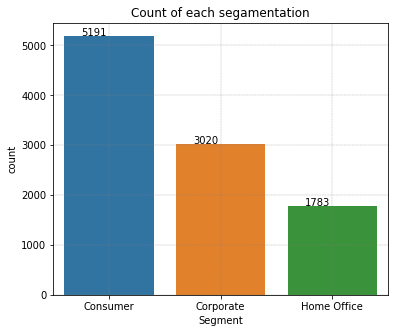

In [22]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot('Segment', data = superstore)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.title("Count of each segamentation")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

The Consumer segment are more preferable

### **Calculating Profit gained in each sub-category by segmentwise**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


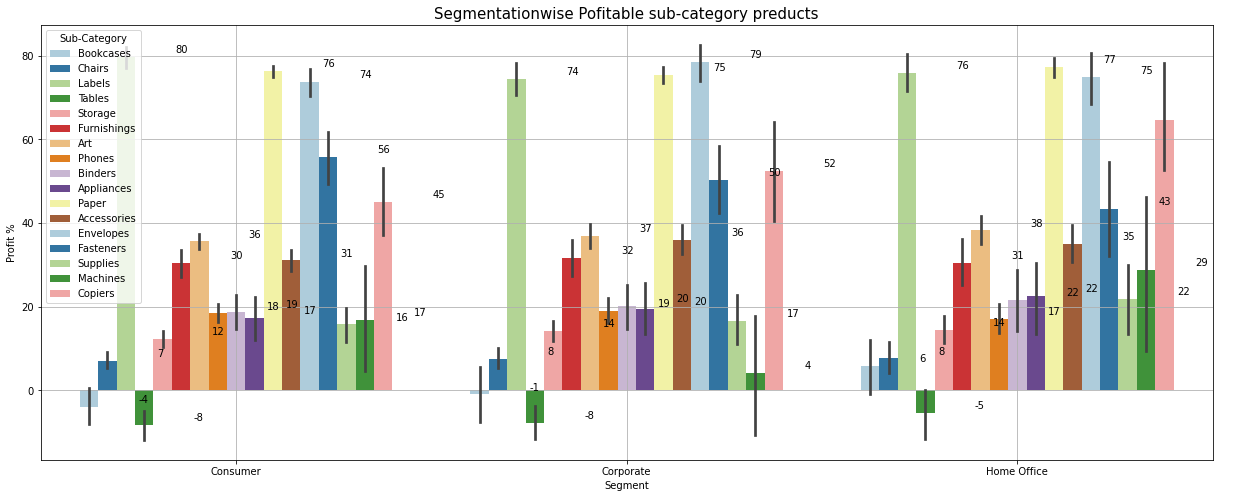

In [25]:
fig=plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)
sns.barplot('Segment','Profit %',hue='Sub-Category',palette='Paired',data=superstore)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.title("Segmentationwise Pofitable sub-category preducts", fontsize=15)
plt.grid()
plt.show()

**Analysis** - The above graph represents, Superstore makes more profit from Paper, Bookcase and supplies sub-categories in each segment.

## **Thank You**